In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_scheduler.utils as rsUtils
from rubin_scheduler.data import get_baseline

In [2]:
# Grab the current baseline file. Should have been downloaded with rubin_sim. 
# Can grab lots of different sims from: http://astro-lsst-01.astro.washington.edu:8081/
baseline_file = 'baseline_v3.3_10yrs.db'
name = os.path.basename(baseline_file).replace('.db','')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)



In [8]:
bundle_list = []

ack = {'5 day':24*5, '10 day': 240}

for key in ack:

    filtername='u'
    # col here could be anything
    metric = maf.metrics.GapsMetric(time_scale=ack[key], metric_name=key)
    # Select all the visits. Could do something like 'filter="r"'
    sql = "filter = '%s'" % filtername
    slicer = maf.slicers.HealpixSlicer()
    bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name, plot_dict={'color_max': 15}))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:143: UserWarning: Optimal bin calculation tried to make 473 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:143: UserWarning: Optimal bin calculation tried to make 480 bins, returning 200
  warnings.warn(


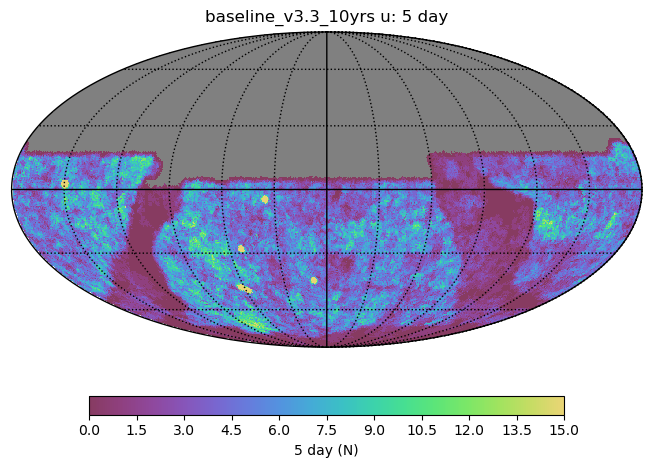

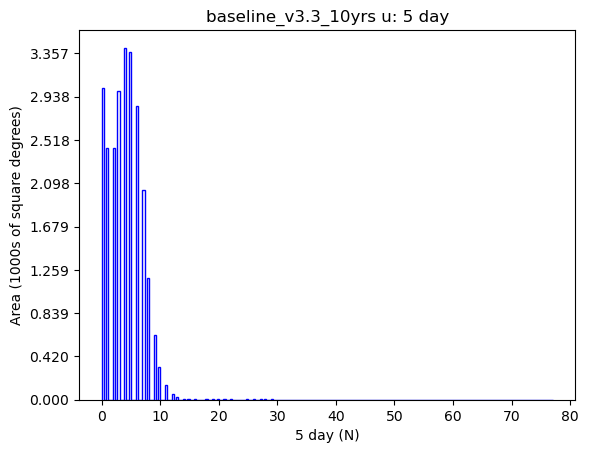

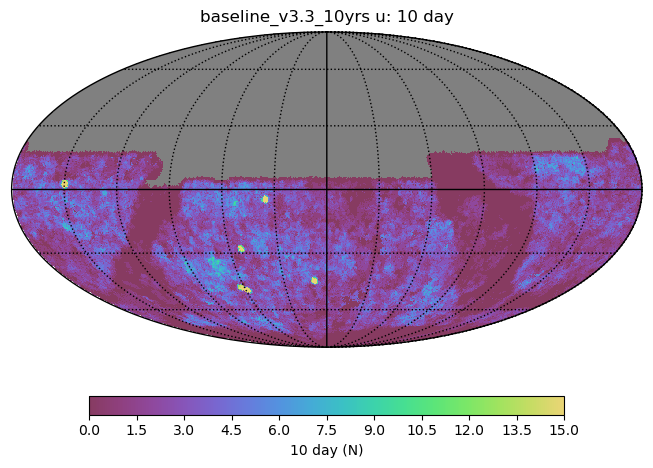

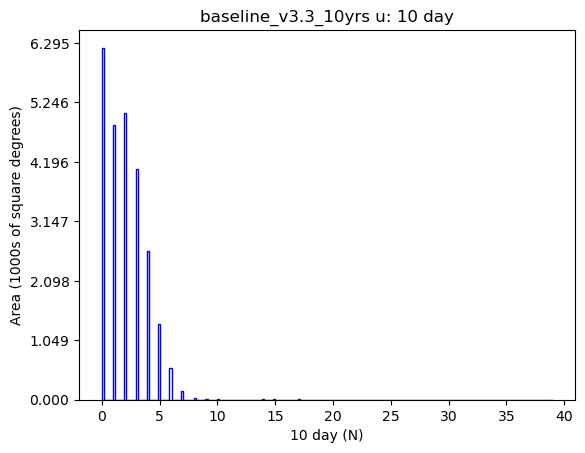

In [9]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, out_dir=out_dir, results_db=results_db)
bg.run_all()
bg.plot_all(closefigs=False)